# Small dataset: 5 frames

In [204]:
%load_ext autoreload
%autoreload 2
from DLC_for_WBFM.utils.visualization.plot_traces import *
from DLC_for_WBFM.utils.visualization.plot_context_utils import *
from DLC_for_WBFM.utils.visualization.plot_context_utils import _plot_video_crop_trace

from DLC_for_WBFM.utils.feature_detection.utils_features import *
from DLC_for_WBFM.utils.feature_detection.utils_tracklets import *
from DLC_for_WBFM.utils.feature_detection.utils_detection import *
from DLC_for_WBFM.utils.feature_detection.visualization_tracks import *
from DLC_for_WBFM.utils.feature_detection.feature_pipeline import *
from DLC_for_WBFM.utils.feature_detection.utils_affine import *
import os
from DLC_for_WBFM.utils.feature_detection.utils_candidate_matches import *
from DLC_for_WBFM.bin.configuration_definition import *


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Get the 3d bigtiff folder
bigtiff_folder = r'D:\More-stabilized-wbfm'

btf_fname_red = r'test2020-10-22_16-15-20_test4-channel-0-pco_camera1\test2020-10-22_16-15-20_test4-channel-0-pco_camera1bigtiff.btf'
btf_fname_red = os.path.join(bigtiff_folder, btf_fname_red)

# Get behavioral annotations

In [131]:
folder_name = r'Y:\shared_projects\wbfm\dat\More-stabilized-wbfm\test2020-10-22_16-22-22_test4-channel-0-'

fname = 'Beh_Annotation.csv'
fname = os.path.join(folder_name, fname)
Beh_df1 = pd.read_csv(fname)

fname = 'Beh_Annotation_Timeline.csv'
fname = os.path.join(folder_name, fname)
Beh_df2 = pd.read_csv(fname)

beh_dict = {-1:'Rev', 0:'Pause', 1:'Fwd', 2:'Coiled'}
color_dict = {-1:'k', 0:None, 1:None, 2: 'y'}


def shade_using_df(df=Beh_df1, color_dict=color_dict, offset=0):    
    for _, row in df.iterrows():
        start, end, _, code = row
        color = color_dict[code]
        if color is None or start+offset < 0:
            continue
        plt.axvspan(start+offset, end+offset, alpha=0.2, color=color)

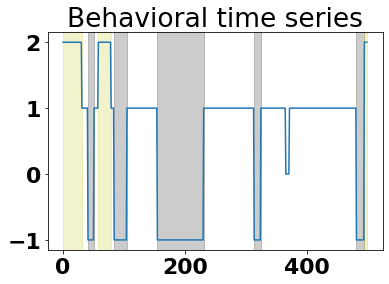

In [132]:
plt.plot(Beh_df2[' beh_code'])
plt.title('Behavioral time series')
shade_using_df()

# Traces

In [209]:
config_fname = 'C:\\Users\\charles.fieseler\\Documents\\Current_work\\DLC_for_WBFM\\example-feature-workflow\\feature_alignment\\feature_alignment-test-Charlie-2021-02-23\\config.pickle'
c = load_config(config_fname)
traces = pd.read_pickle(c.traces.traces_fname)

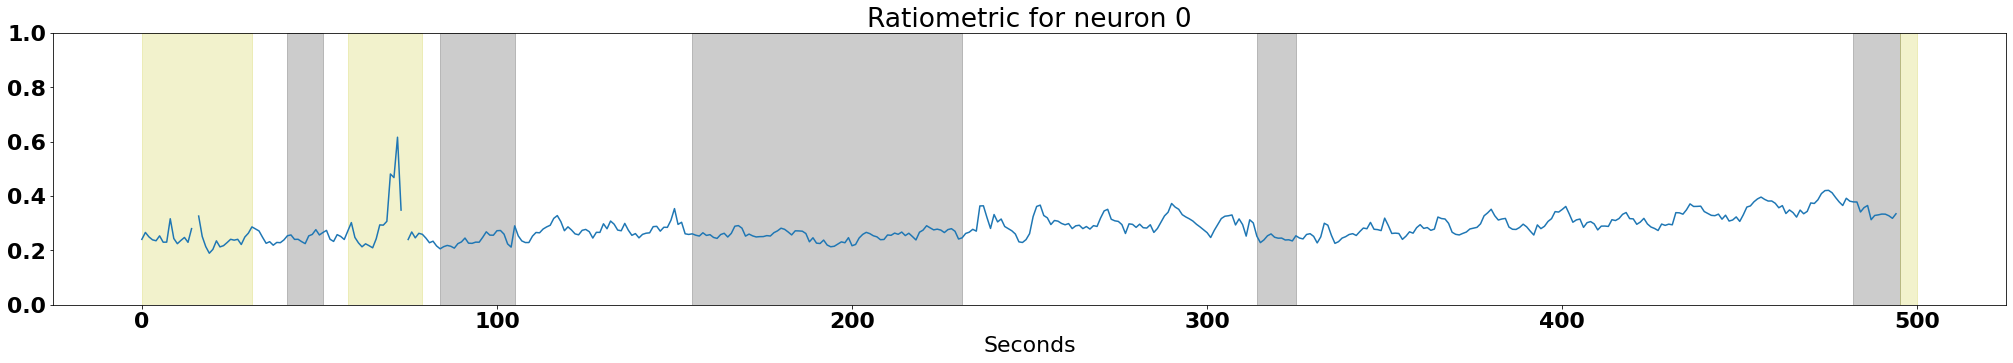

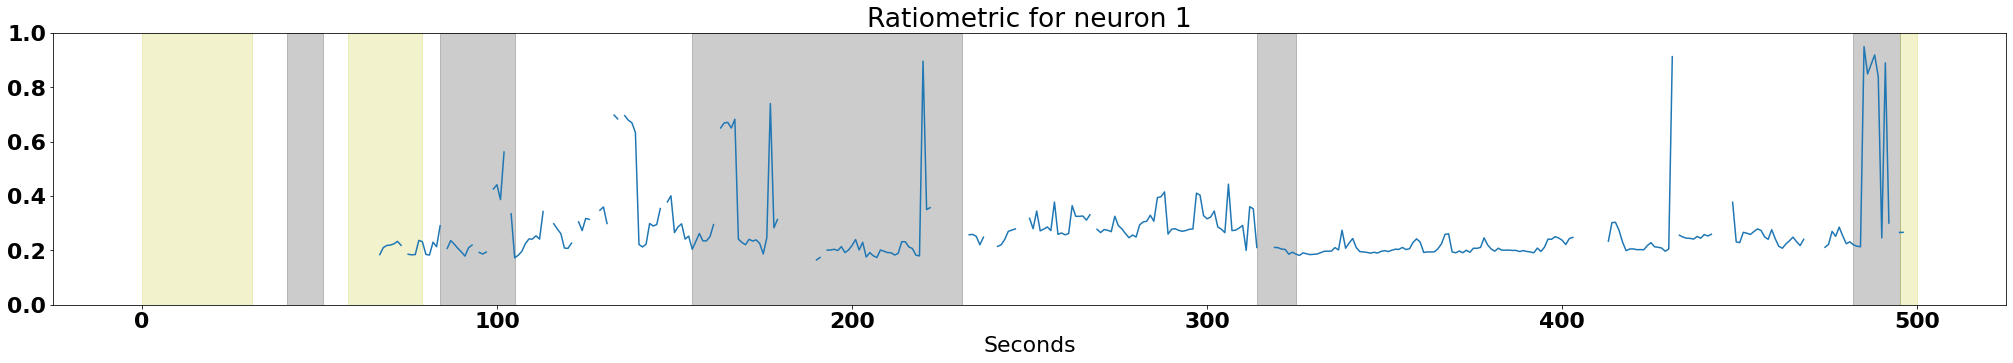

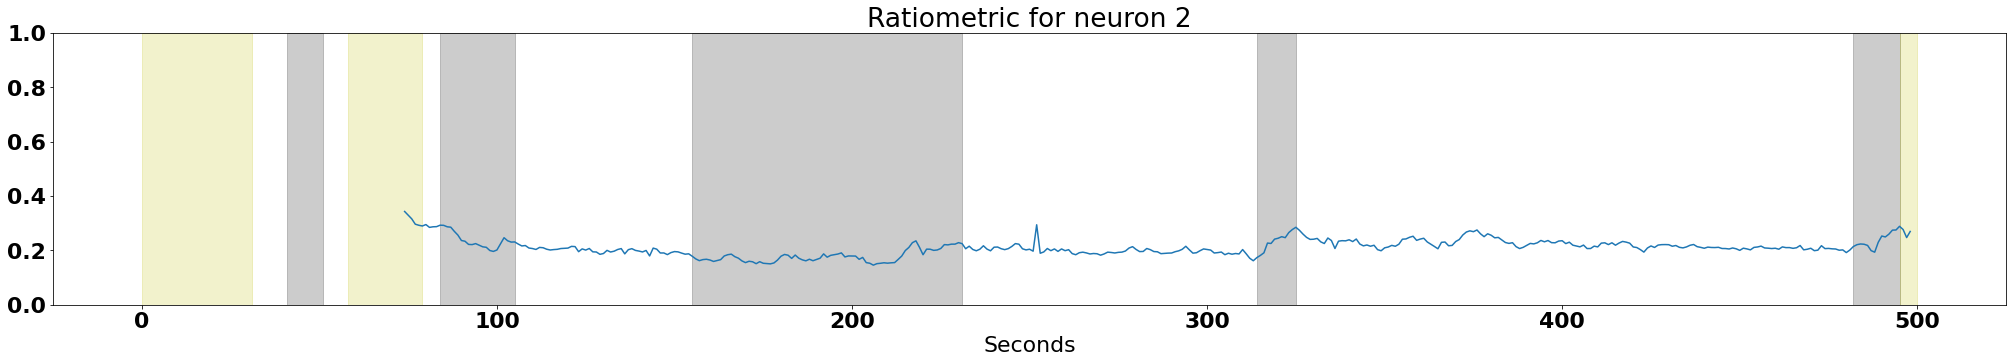

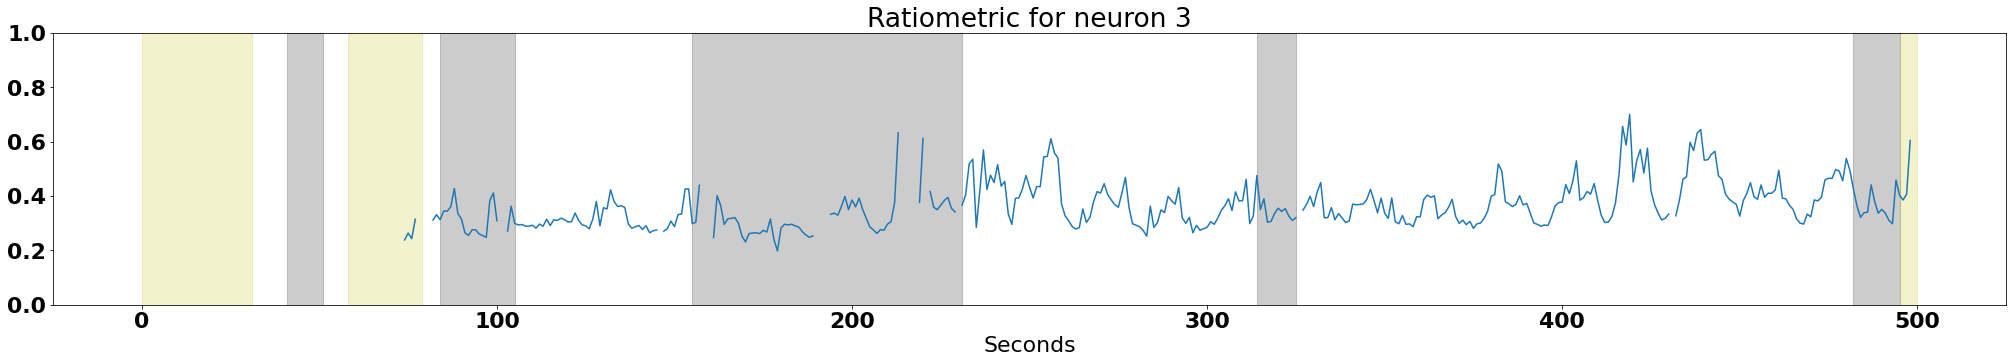

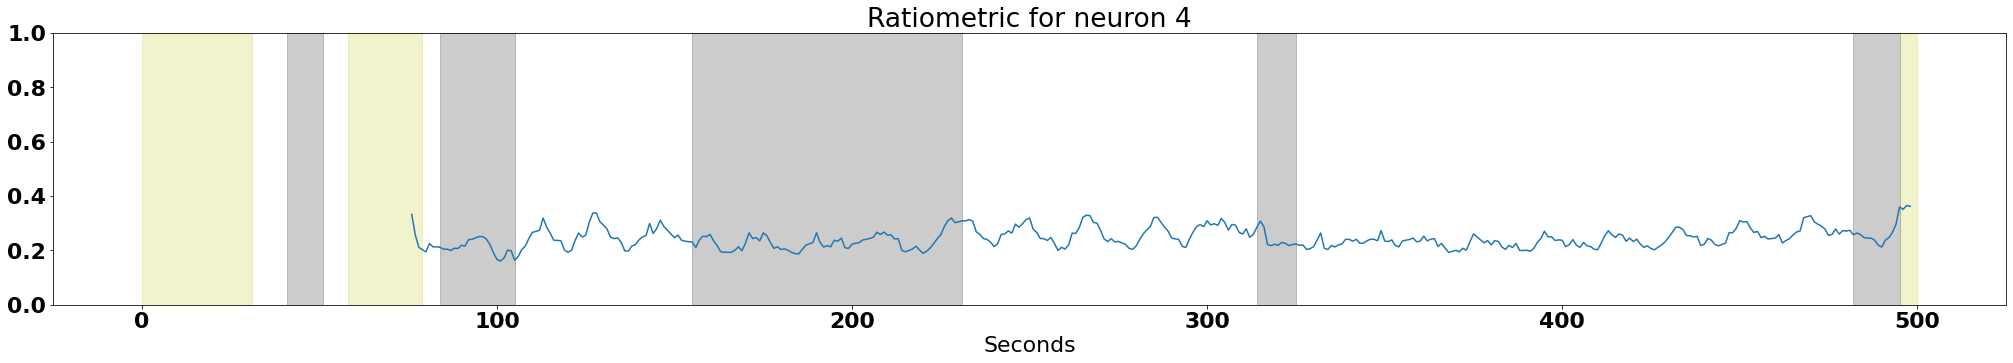

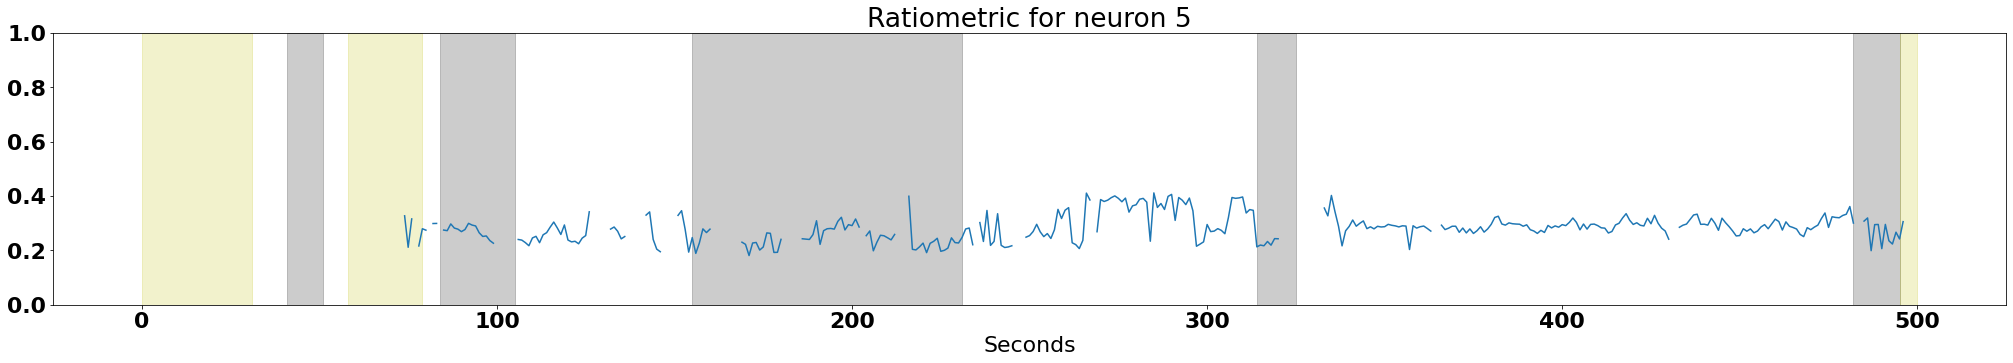

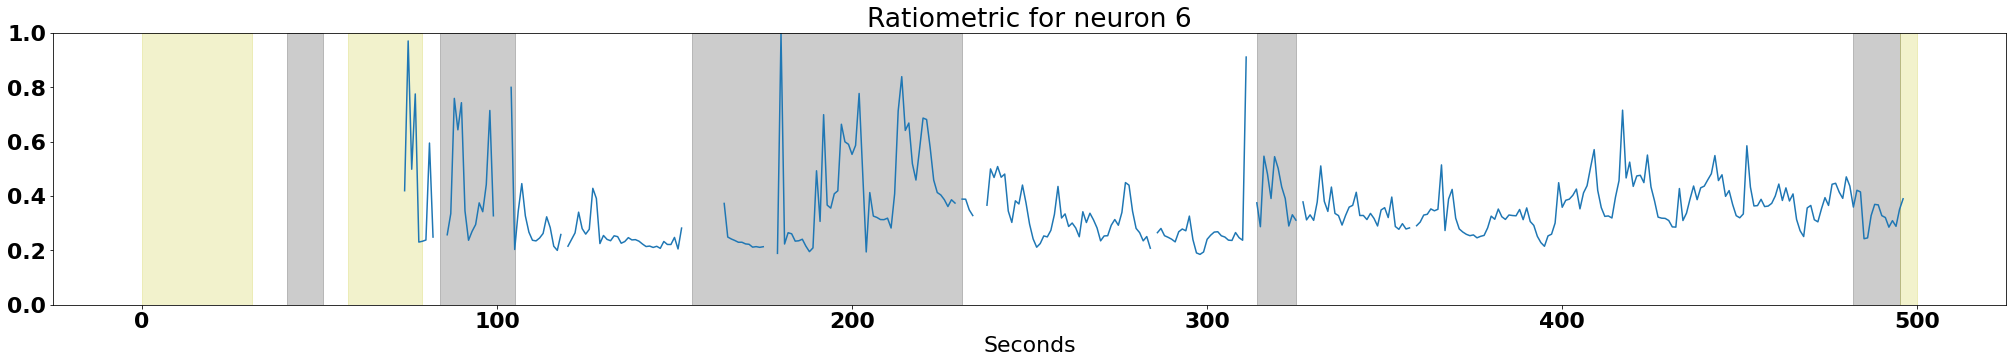

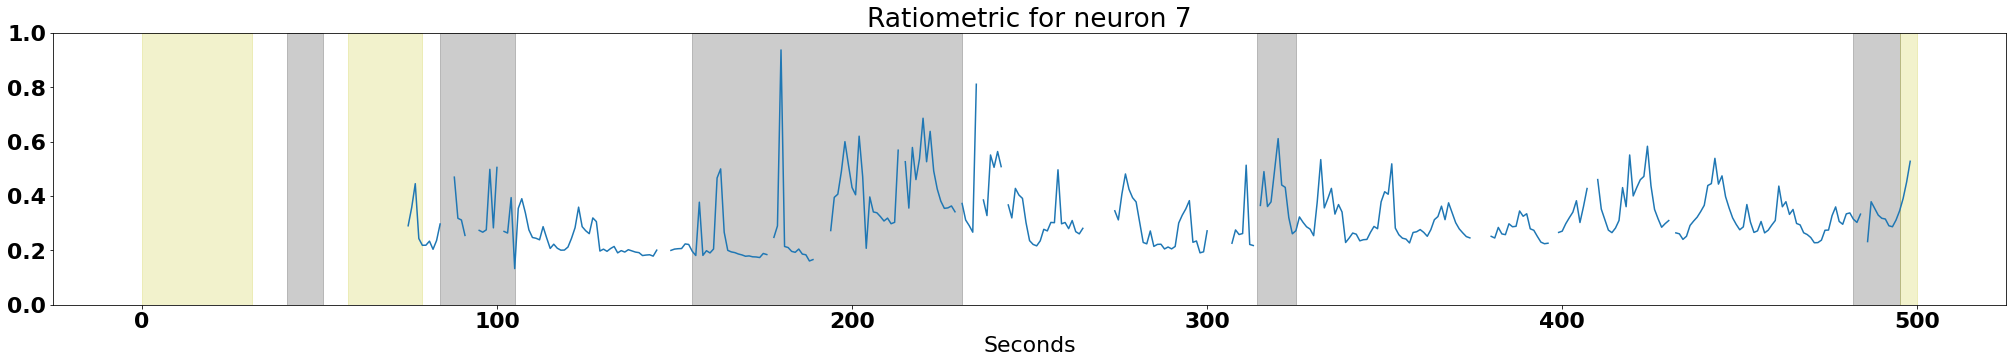

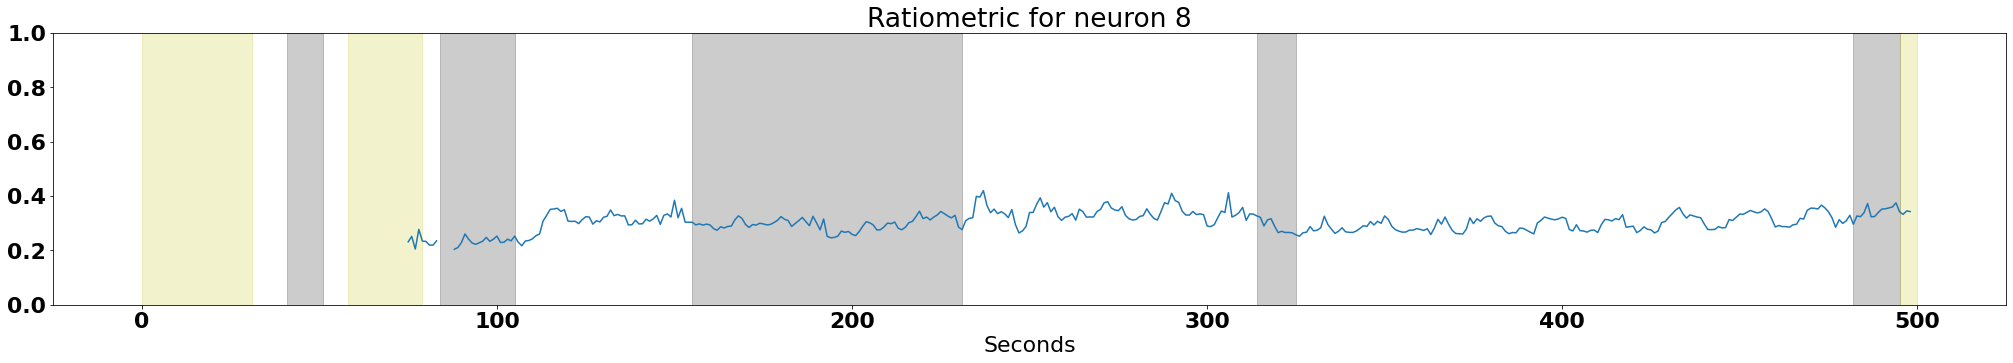

In [228]:
which_neuron = 0
set_big_font()

for which_neuron in range(9):
    visualize_ratio(traces[which_neuron],
                        f'{which_neuron}',
                        which_neuron,
                        tspan=None,
                        background=[5,5])
    shade_using_df()
    
    plt.savefig(f'Ratiometric for {which_neuron}', bbox_inches='tight')

<IPython.core.display.Javascript object>


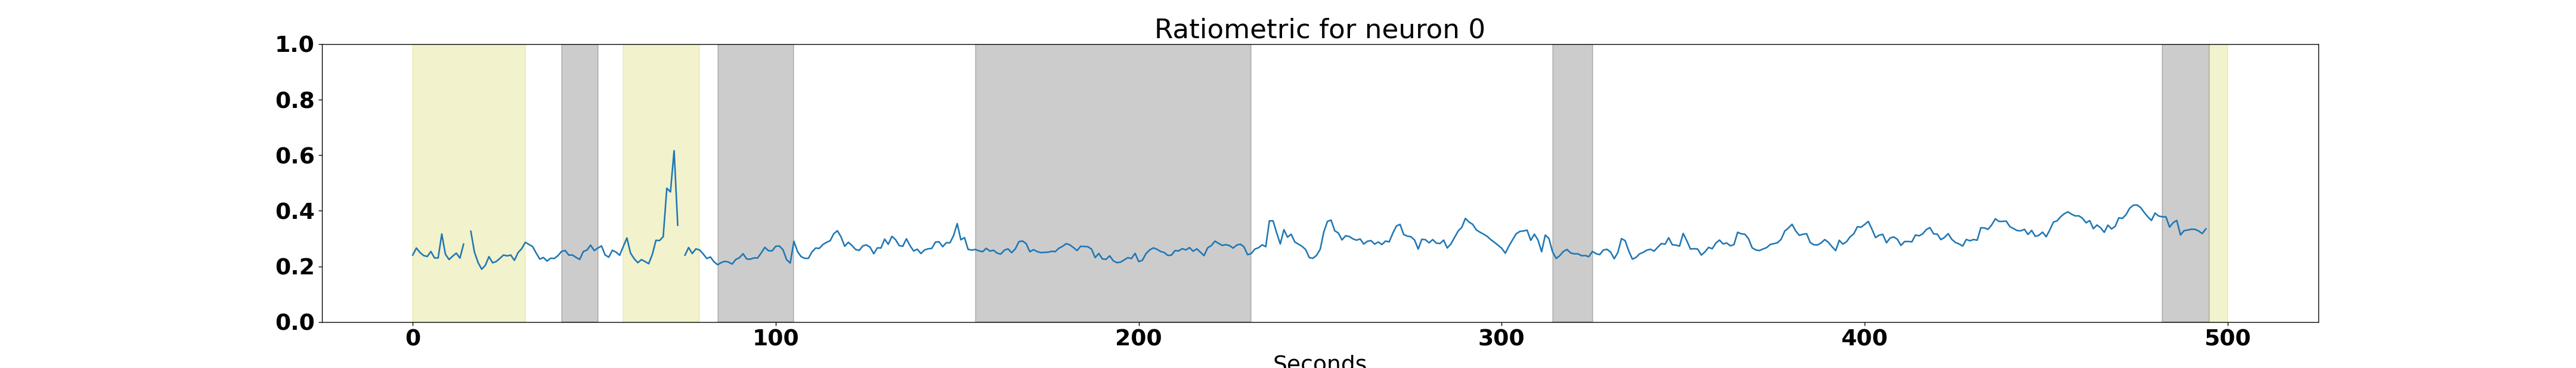

In [231]:
which_neuron = 0
set_big_font()
%matplotlib notebook
visualize_ratio(traces[which_neuron],
                    f'{which_neuron}',
                    which_neuron,
                    tspan=None,
                    background=[5,5])
shade_using_df()
    

# Single-frame matches

In [133]:
which_suffix = 'affine-and-features'

fname = f'feature_alignment/clust_df_dat_{which_suffix}.pickle'
with open(fname, 'rb') as f:
    clust_df1 = pickle.load(f)
    
fname = f'feature_alignment/match_dat_{which_suffix}.pickle'
with open(fname, 'rb') as f:
    all_matches1, _ = pickle.load(f)

In [134]:
all_len1 = clust_df1['slice_ind'].apply(len)

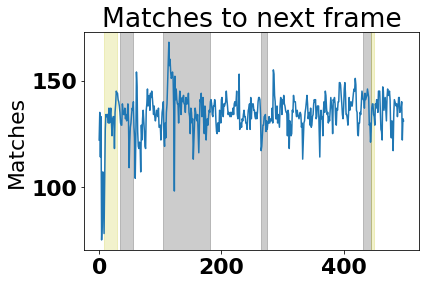

In [138]:
all_num_matches = [len(val) for k, val in all_matches1.items()]
plt.plot(all_num_matches);
plt.title("Matches to next frame")
plt.ylabel('Matches')
shade_using_df(offset=-50)

plt.savefig("Matches to next frame", bbox_inches='tight')

## Frame coverage

In [146]:
from collections import defaultdict
all_num_tracks = defaultdict(int)
min_len = 20
for row in clust_df1['slice_ind']:
    if len(row) < min_len:
        continue
    for ind in row:
        all_num_tracks[ind] += 1

num_frames = 500
all_num = np.zeros(num_frames)
for k, val in all_num_tracks.items():
    all_num[k] = val

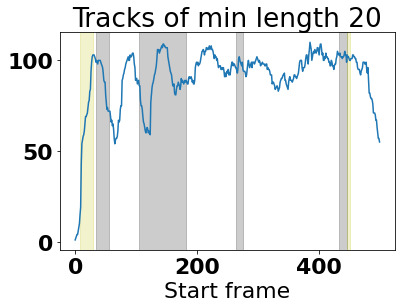

In [147]:

plt.plot(all_num)
title_str = f"Tracks of min length {min_len}"
plt.title(title_str)
plt.xlabel("Start frame")
shade_using_df(offset=-50)

plt.savefig(title_str, bbox_inches='tight')

## Long tracks

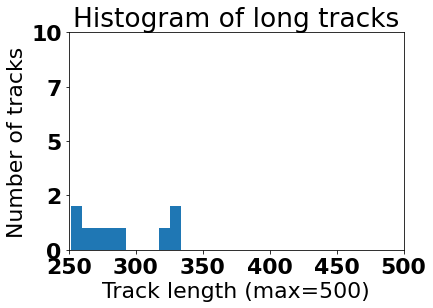

In [167]:
from matplotlib.ticker import FormatStrFormatter

min_to_plot = 250
fig, ax = plt.subplots()

plt.hist(all_len1[all_len1>min_to_plot])
plt.title("Histogram of long tracks")
plt.ylabel('Number of tracks')
plt.xlabel('Track length (max=500)')
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.ylim([0,10])
plt.xlim([250,500])

plt.savefig("Track lengths for single matches", bbox_inches='tight')

# Z motion with behavior (multiple matches)

## First get track location data

In [49]:
which_suffix = 'sequential7'

fname = f'feature_alignment/clust_df_dat_{which_suffix}.pickle'
with open(fname, 'rb') as f:
    clust_df2 = pickle.load(f)
    
fname = f'feature_alignment/match_dat_{which_suffix}.pickle'
with open(fname, 'rb') as f:
    all_matches2 = pickle.load(f)

In [50]:
all_len2 = clust_df2['slice_ind'].apply(len)

## Plot together

In [103]:
from DLC_for_WBFM.utils.visualization.plot_traces import set_big_font

In [111]:
%matplotlib inline

to_save = True

set_big_font()

for which_neuron in range(9):

    plt.figure()
    min_length = 400
    all_long_enough = np.where(all_len2>min_length)[0]

    ind = all_long_enough[which_neuron]
    xyz = np.asarray(clust_df2['all_xyz'].iloc[ind])

    plt.plot(xyz[:,0])
    plt.xlabel("Frames")
    plt.ylabel("Z axis")
    title_str = f"Z location of neuron {which_neuron}"
    plt.title(title_str)

    shade_using_df()
    if to_save:
        plt.savefig(title_str, bbox_inches='tight')
        print(f"Saved {title_str}")
        plt.close()

Saved Z location of neuron 0
Saved Z location of neuron 1
Saved Z location of neuron 2
Saved Z location of neuron 3
Saved Z location of neuron 4
Saved Z location of neuron 5
Saved Z location of neuron 6
Saved Z location of neuron 7
Saved Z location of neuron 8


## Long tracks (multiple matches)

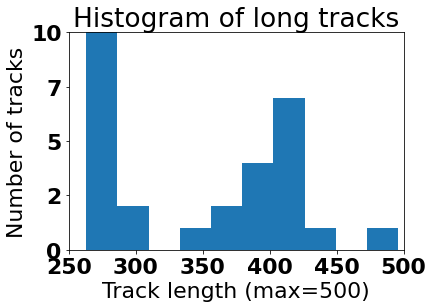

In [168]:
from matplotlib.ticker import FormatStrFormatter

min_to_plot = 250
fig, ax = plt.subplots()

plt.hist(all_len2[all_len2>min_to_plot])
plt.title("Histogram of long tracks")
plt.ylabel('Number of tracks')
plt.xlabel('Track length (max=500)')
ax.xaxis.set_major_formatter(FormatStrFormatter('%d'))
ax.yaxis.set_major_formatter(FormatStrFormatter('%d'))
plt.ylim([0,10])
plt.xlim([250,500])

plt.savefig("Track lengths for multiple matches", bbox_inches='tight')

# TODO: clique matches for reference frames

In [42]:
opt = {'start_frame':50,
       'num_frames':20,
       'num_reference_frames':15,
       'start_slice':4,
       'add_affine_to_candidates':True,
       'add_gp_to_candidates':False}
p = PreprocessingSettings()
p.do_filtering=False
p.do_rigid_alignment=True
p.do_mini_max_projection=True

out = track_via_reference_frames(btf_fname_red, **opt, preprocessing_settings=p)
all_matches, all_other_frames, reference_set = out

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [02:36<00:00, 31.24s/it]


## Triangle matches

In [43]:
plot_three_point_clouds(reference_set.reference_frames, reference_set.pairwise_matches, ind=2)

[PointCloud with 143 points.,
 PointCloud with 150 points.,
 LineSet with 136 lines.,
 PointCloud with 143 points.,
 PointCloud with 150 points.,
 LineSet with 136 lines.,
 PointCloud with 150 points.,
 PointCloud with 150 points.,
 LineSet with 142 lines.]

## Size of connected components

In [188]:
num_ref = len(reference_set.reference_frames)
# k_values = [num_ref, num_ref-1, num_ref-2]
k_values = [15,14,13,12,11,10,9]#,8,7,6,5]
list_min_sizes = [0]

all_communities = calc_neurons_using_k_cliques(reference_set.pairwise_matches,
                                 k_values = k_values,
                                 list_min_sizes = list_min_sizes,
                                 max_size = num_ref)

2255 nodes remaining
2101 nodes remaining
1952 nodes remaining
1688 nodes remaining
1535 nodes remaining
1292 nodes remaining
1074 nodes remaining


(array([  7.,   7.,  21.,  21.,  40.,  40.,  60.,  60.,  78., 101.]),
 array([ 9. ,  9.5, 10. , 10.5, 11. , 11.5, 12. , 12.5, 13. , 13.5, 14. ]),
 [<matplotlib.patches.Polygon at 0x27cadb170c8>])

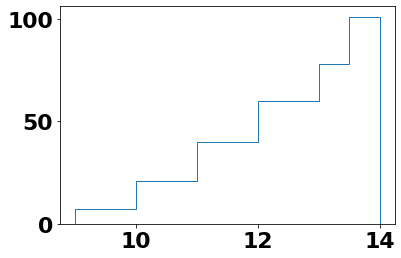

In [203]:
all_neuron_len = list(map(len, all_communities))

plt.hist(all_neuron_len, cumulative=True, histtype='step')

In [199]:
# clique_matches = community_to_matches(all_communities)

# Scratch
# ======================================

In [170]:

all_matches = reference_set.pairwise_matches

num_frames = len(all_matches)
frame_subset = list(range(num_frames))
match_subset = {}
for i0 in frame_subset:
    for i1 in frame_subset:
        k = (i0,i1)
        if k in all_matches:
            match_subset[k] = all_matches[k]
# DG = build_digraph_from_matches(match_subset, verbose=0)

In [171]:
bp_match_dict = {}
for key in match_subset:
    bp_matches = calc_bipartite_matches(match_subset[key])
    bp_match_dict[key] = bp_matches
DG_bp = build_digraph_from_matches(bp_match_dict, verbose=0)

Largest connected component size:  370


Text(0.5, 1.0, 'All component sizes for 5 frames (10 neurons)')

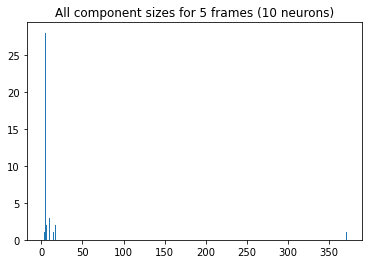

In [41]:
%matplotlib inline
thresh = 0.0

G = get_subgraph_with_strong_weights(DG_bp, thresh)
big_G, all_sz, all_neurons = calc_connected_components(G, False)
plt.hist([z for z in all_sz if z > 1], bins=list(range(1,max(all_sz)+2)));

[vals, counts] = np.unique(all_sz, return_counts=True)
plt.title(f'All component sizes for {num_frames} frames ({len(vals)} neurons)')

# plt.vlines(num_frames,0,max(counts))
# print("Sizes and number of components:")
# for v, c in zip(vals, counts):
#       print([v, c])

 # Import analyzed data

In [1]:
config_fname = 'C:\\Users\\charles.fieseler\\Documents\\Current_work\\DLC_for_WBFM\\example-feature-workflow\\feature_alignment\\feature_alignment-test-Charlie-2021-02-23\\config.pickle'

In [3]:
from DLC_for_WBFM.bin.configuration_definition import *
c = load_config(config_fname)

# Interactive visualizations with video

In [6]:
_plot_video_crop_trace(config_fname, 0, 10)

Cropping 13 slices, starting at 8
Full size read as (700, 900)
Cropping 13 slices, starting at 8
Full size read as (700, 900)


interactive(children=(IntSlider(value=4, description='t', max=9), IntSlider(value=6, description='z', max=12),…

<function DLC_for_WBFM.utils.visualization.plot_context_utils._plot_video_crop_trace.<locals>.<lambda>(t, z)>

In [11]:

from DLC_for_WBFM.utils.visualization.plot_interactive import InteractiveConfig

In [70]:
obj = InteractiveConfig(config_fname, which_neurons=[0])

Loading video data for 1 neurons...
Cropping 13 slices, starting at 8
Full size read as (700, 900)
Cropping 13 slices, starting at 8
Full size read as (700, 900)
Finished loading video data


In [143]:
obj.reset_panels()
obj.add_red_panel()
%matplotlib inline
w = obj.build_widget()

Total number of panels: 1


interactive(children=(IntSlider(value=249, description='t', max=499), IntSlider(value=6, description='z', max=…

In [138]:
obj.panel_updaters[0](10,0, obj.panel_objs[0])
plt.show()

IndexError: list index out of range

Updating line...


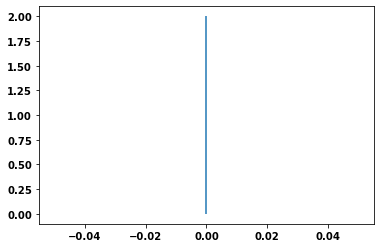

In [142]:
 obj.panel_updaters[0](0,0)

In [22]:
from ipywidgets import interact, interactive, fixed, interact_manual


In [23]:
interact_manual?